In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) 


Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [38]:
image_width = 28
image_height = 28
n_input = image_width * image_height   # input layer (28x28 pixels)
n_hidden1 = 512 # 1st hidden layer
n_hidden2 = 256 # 2nd hidden layer
n_hidden3 = 128 # 3rd hidden layer
n_output = 10   # output layer (0-9 digits)


In [13]:
learning_rate = 1e-4
n_iterations = 1000
batch_size = 1024
dropout = 0.5


In [14]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32) 


In [15]:
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}


In [16]:
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}


In [17]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']


In [18]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)


In [19]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


In [20]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [21]:
# train on mini batches
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={X: batch_x, Y: batch_y, keep_prob:dropout})

    # print loss and accuracy (per minibatch)
    if i%100==0:
        minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
        print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), "\t| Accuracy =", str(minibatch_accuracy))


Iteration 0 	| Loss = 3.816104 	| Accuracy = 0.2109375


Iteration 100 	| Loss = 0.52931464 	| Accuracy = 0.8359375


Iteration 200 	| Loss = 0.40975332 	| Accuracy = 0.90625


Iteration 300 	| Loss = 0.34003377 	| Accuracy = 0.8671875


Iteration 400 	| Loss = 0.22734252 	| Accuracy = 0.9375


Iteration 500 	| Loss = 0.19072498 	| Accuracy = 0.96875


Iteration 600 	| Loss = 0.33757013 	| Accuracy = 0.9140625


Iteration 700 	| Loss = 0.31795266 	| Accuracy = 0.890625


Iteration 800 	| Loss = 0.27162743 	| Accuracy = 0.9140625


Iteration 900 	| Loss = 0.35677615 	| Accuracy = 0.890625


In [22]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob:1.0})
print("Accuracy on test set:", test_accuracy)


Accuracy on test set: 0.9166


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


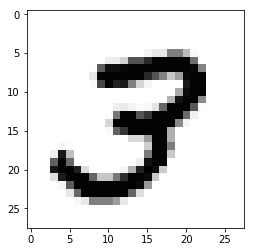

In [53]:
sample_img = mnist.train.images[67].reshape(28, 28)
sample_img_label = mnist.train.labels[11]
print(sample_img_label)
plt.imshow(sample_img).set_cmap('Greys')

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


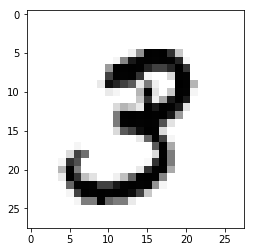

In [54]:
sample_img = mnist.train.images[1].reshape(28, 28)
sample_img_label = mnist.train.labels[2]
print(sample_img_label)
plt.imshow(sample_img).set_cmap('Greys')

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


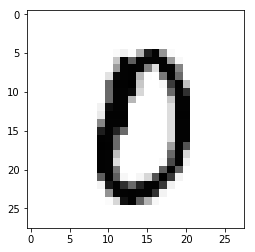

In [59]:
sample_img = mnist.test.images[55].reshape(28, 28)
sample_img_label = mnist.test.labels[1]
print(sample_img_label)
plt.imshow(sample_img).set_cmap('Greys')

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


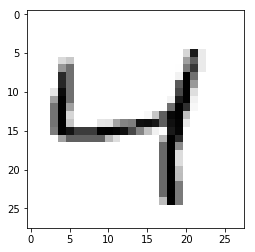

In [32]:
sample_img = mnist.validation.images[2].reshape(28, 28)
sample_img_label = mnist.validation.labels[2]
print(sample_img_label)
plt.imshow(sample_img).set_cmap('Greys')